In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Movies and Ratings as DataFrame

In [637]:
movies_df = pd.read_csv('../ml-latest-small/movies.csv')
print('Dataset - Movies')
print('-------------------------')
print('Number of Rows: ' + str(movies_df.shape[0]))
print('Number of Columns: ' + str(movies_df.shape[1]))
movies_df.head()

Dataset - Movies
-------------------------
Number of Rows: 9742
Number of Columns: 3


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [638]:
ratings_df = pd.read_csv('../ml-latest-small/ratings.csv')
print('Dataset - User Ratings')
print('-------------------------')
print('Number of Rows: ' + str(ratings_df.shape[0]))
print('Number of Columns: ' + str(ratings_df.shape[1]))
ratings_df.head()

Dataset - User Ratings
-------------------------
Number of Rows: 100836
Number of Columns: 4


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Data Cleaning and Preprocessing Movies Data

In [639]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### Extract Year from Title and Create New Column

In [640]:
# # extract (year) from title and add to a new column
# movies_df['year'] = movies_df['title'].str.extract('(\(\d\d\d\d\))')

# # extract parenthesis from column year
# movies_df['year'] = movies_df['year'].str.extract('(\d\d\d\d)')

# # strip ending white space characters from title
# movies_df['title'] = movies_df['title'].str.replace('(\(\d\d\d\d\))', '').apply(lambda x: x.strip())

# movies_df.head()

### Split Genres into a List of Genres

In [641]:
# for each row, split genres into a list
movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split('|'))

In [642]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


### Check Missing Values

In [643]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [644]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### One-Hot-Encode

In [645]:
# First let's make a copy of the movies_df.
movies_with_genres = movies_df.copy(deep=True)
# Let's iterate through movies_df, then append the movie genres as columns of 1s or 0s.
# 1 if that column contains movies in the genre at the present index and 0 if not.
x = []
for index, row in movies_df.iterrows():
    x.append(index)
    for genre in row['genres']:
        movies_with_genres.at[index, genre] = 1
# Confirm that every row has been iterated and acted upon.
print(len(x) == len(movies_df))
movies_with_genres.head(5)

True


,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1.0,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),[Comedy],NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [646]:
# # Remove rows with no genre listed and remove column '(no genres listed)' since it doesn't provide useful information
# movies_with_genres = movies_with_genres[movies_with_genres['genres'] != '']
# movies_with_genres = movies_with_genres.drop(['(no genres listed)'],axis=1)

In [647]:
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre.
movies_with_genres = movies_with_genres.fillna(0)
movies_with_genres.head(3)

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Cleaning and Preprocessing Ratings Data

In [648]:
# print out the shape and first five rows of ratings data.
print('Ratings_df shape:',ratings_df.shape)
ratings_df.head()

Ratings_df shape: (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [649]:
# Dropping the timestamp column
ratings_df.drop('timestamp', axis=1, inplace=True)
# Confirming the drop
ratings_df.head(3)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0


In [650]:
ratings_df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [651]:
ratings_df.dtypes

userId       int64
movieId      int64
rating     float64
dtype: object

In [652]:
ratings_df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

### Exploratory Data Analysis (EDA)

In [653]:
# manually created a list of genres
list_of_genres = movies_with_genres.columns

# created a function to count the movies with that genre
def filtered_genres(list_of_genres, column):
    dict = {}
    for genre in list_of_genres:
        for row in column:
            if genre in row:
                if genre in dict:
                    dict[genre] += 1
                else:
                    dict[genre] = 1
    return dict

                Genres  Count_Genres
0                Drama          4361
1               Comedy          3756
2             Thriller          1894
3               Action          1828
4              Romance          1596
5            Adventure          1263
6                Crime          1199
7               Sci-Fi           980
8               Horror           978
9              Fantasy           779
10            Children           664
11           Animation           611
12             Mystery           573
13         Documentary           440
14                 War           382
15             Musical           334
16             Western           167
17                IMAX           158
18           Film-Noir            87
19  (no genres listed)            34


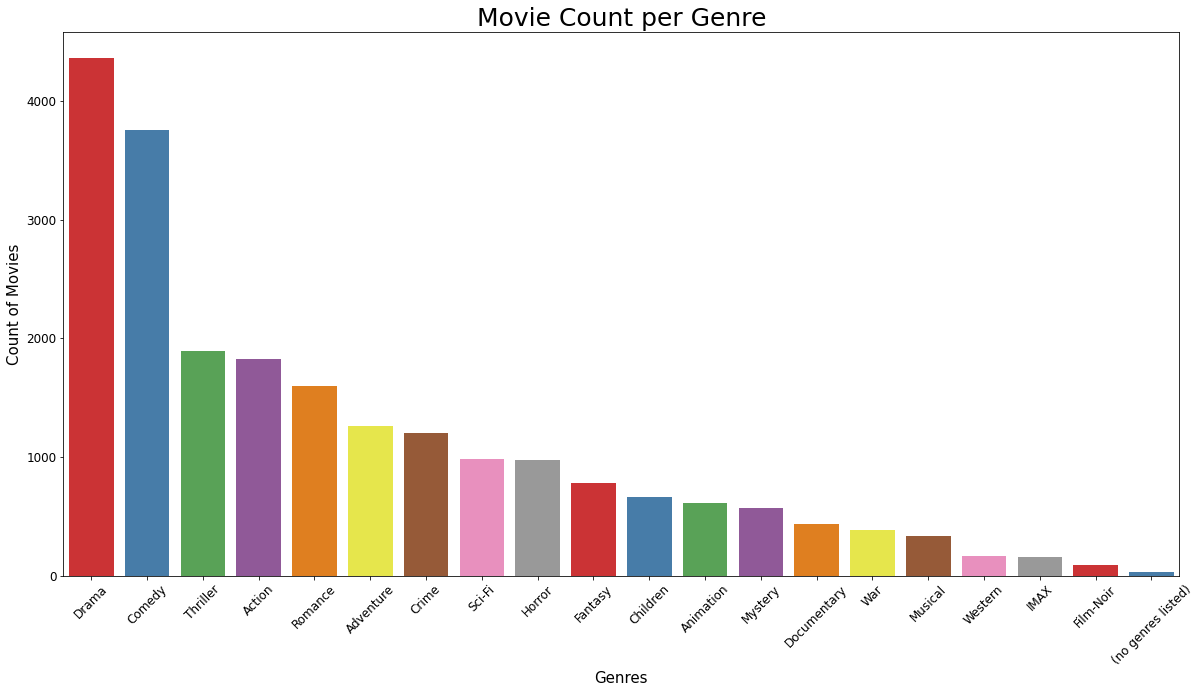

In [654]:
count_of_genres = filtered_genres(list_of_genres, movies_with_genres['genres'])

plt.figure(figsize=(20,10))
lists = sorted(count_of_genres.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
x, y  = pd.Series(x, name='Genres'), pd.Series(y, name='Count_Genres')
df_genres = pd.concat([x,y], axis=1)
print(df_genres)


chart = sns.barplot(x=x, y=y,palette='Set1')
plt.title('Movie Count per Genre', fontsize=25)
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Count of Movies', fontsize=15)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.savefig('../images/movie_count_per_genre.png');

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


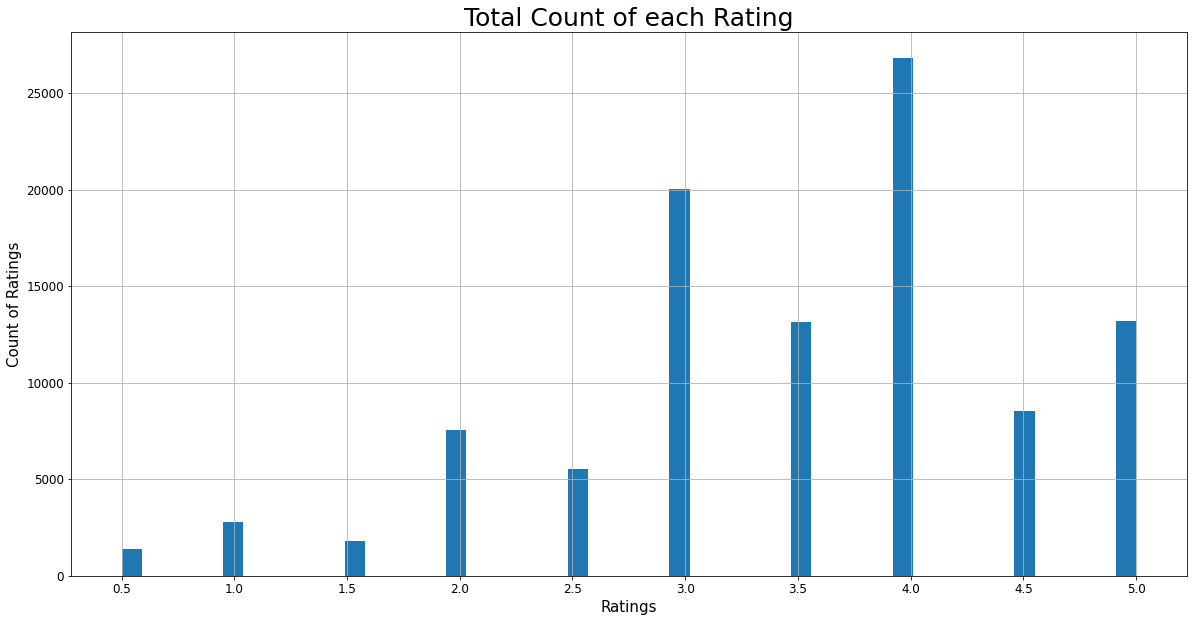

In [655]:
print(ratings_df['rating'].value_counts(sort=True))

plt.figure(figsize=(20,10))
ratings_df['rating'].hist(bins=50)
plt.title('Total Count of each Rating', fontsize=25)
plt.xlabel('Ratings', fontsize=15)
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.ylabel('Count of Ratings', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('../images/total_count_movies_per_rating.png');

        rating
userId        
1          232
2           29
3           39
4          216
5           44
...        ...
606       1115
607        187
608        831
609         37
610       1302

[610 rows x 1 columns]


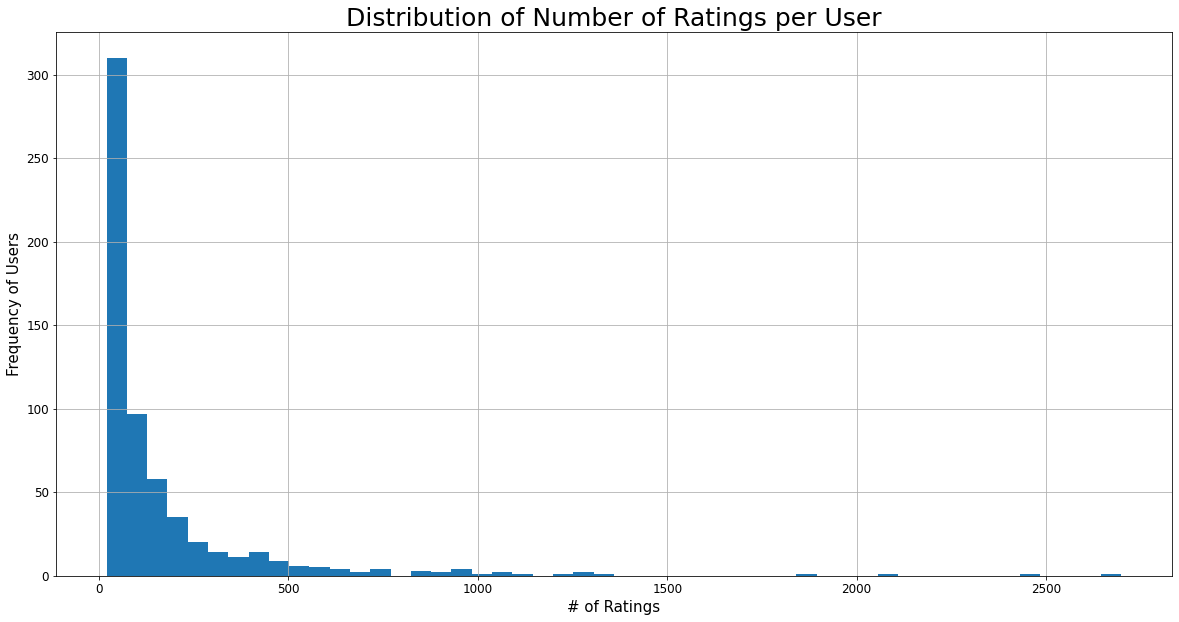

In [656]:
frequency_count_ratings = ratings_df[['userId','rating']].groupby(by=['userId']).count()
print(frequency_count_ratings)

# matplotlib
plt.figure(figsize=(20,10))
frequency_count_ratings['rating'].hist(bins=50)
plt.title('Distribution of Number of Ratings per User', fontsize=25)
plt.xlabel('# of Ratings', fontsize=15)
plt.ylabel('Frequency of Users', fontsize=15)

# # seaborn
# plt.figure(figsize=(20,10))
# sns.distplot(frequency_count_ratings['rating'],color='g')
# plt.hist(frequency_count_ratings,color='g',bins=5)
# plt.title('Frequency of Number of Ratings per User', fontsize=25)
# plt.xlabel('Users', fontsize=15)
# plt.ylabel('Frequency', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('../images/frequency_number_ratings_per_user.png');

In [657]:
ratings_df[['movieId','rating']].groupby(by=['movieId']).mean()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [658]:
# Average number of ratings per movie
avg_rating = ratings_df[['movieId','rating']].groupby(by=['movieId']).mean().reset_index().rename(columns={'rating':'avg_rating',})
# Number of ratings per movie
num_rating = ratings_df[['movieId','rating']].groupby(by=['movieId']).count().reset_index().rename(columns={'rating':'num_rating'})

# Dataframe
rating_df = pd.concat([avg_rating,num_rating],axis=1,join='inner').iloc[:,[0,1,3]].sort_values(by=['num_rating'],ascending=False)
rating_df.head()

,movieId,avg_rating,num_rating
314,356,4.164134,329
277,318,4.429022,317
257,296,4.197068,307
510,593,4.161290,279
1938,2571,4.192446,278


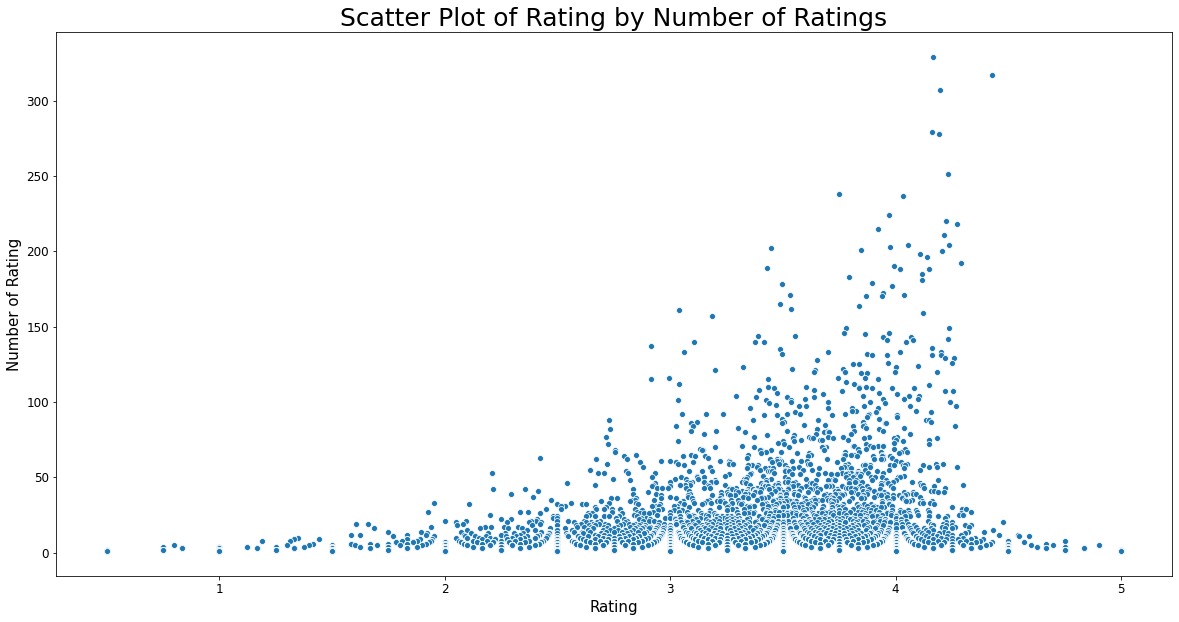

In [659]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=rating_df, x="avg_rating", y="num_rating", legend='full')
plt.title('Scatter Plot of Rating by Number of Ratings', fontsize=25)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Number of Rating', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('../images/average_rating_x_number_ratings.png');

### Building a Recommender System (Content Based)

Content based recommender system tries to recommend items to users, based on their profile. The user's profile revolves around the user's preferences, or based on the user rating.

In [660]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


### Create Personal User Ratings

In [662]:
# created a random list of movies for a user
user_movie_ratings = [
            {'title':'Jumanji (1995)', 'rating':3.0},
            {'title':'No Game No Life: Zero (2017)', 'rating':4.5},
            {'title':'Grumpier Old Men (1995)', 'rating':4.5}
         ] 
user_movie_ratings = pd.DataFrame(user_movie_ratings)
user_movie_ratings

,title,rating
0,Jumanji (1995),3.0
1,No Game No Life: Zero (2017),4.5
2,Grumpier Old Men (1995),4.5


In [663]:
movies_df['title'].isin(user_movie_ratings['title'])

0       False
1        True
2        True
3       False
4       False
        ...  
9737    False
9738     True
9739    False
9740    False
9741    False
Name: title, Length: 9742, dtype: bool

In [664]:
# Merge the personal movie ratings dataframe to retrieve the movieId
user_movie_Id = movies_df[movies_df['title'].isin(user_movie_ratings['title'])]
user_movie_ratings = pd.merge(user_movie_Id, user_movie_ratings).drop(['genres'],1)
user_movie_ratings

,movieId,title,rating
0,2,Jumanji (1995),3.0
1,3,Grumpier Old Men (1995),4.5
2,193583,No Game No Life: Zero (2017),4.5


### Combine Personal User with Genre DataFrame

Combine the user's dataframe to the genre dataframe, which shows what genres is for each movie.

In [665]:
# filters the movie dataframe for only the personal user movies
user_genres_df = movies_with_genres[movies_with_genres.movieId.isin(user_movie_ratings.movieId)]
user_genres_df

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [666]:
# reset index of dataframe
user_genres_df.reset_index(drop=True, inplace=True)
# drop unnecessary columns
user_genres_df.drop(['movieId','title','genres'], axis=1, inplace=True)
user_genres_df

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Matrix Multiplication

In [667]:
# check if we can even do matrix multiplication: if df1 columns = df2 rows, then yes it'll work
print('Shape of user_movie_ratings is:',user_movie_ratings.shape)
print('Shape of user_genres_df is:',user_genres_df.shape)

Shape of user_movie_ratings is: (3, 3)
Shape of user_genres_df is: (3, 20)


In [668]:
user_genres_df

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Matrix-Vector Dot Multiplication the User Ratings and Genres

In [669]:
user_genres_df.T

,0,1,2
Adventure,1.0,0.0,0.0
Animation,0.0,0.0,1.0
Children,1.0,0.0,0.0
Comedy,0.0,1.0,1.0
Fantasy,1.0,0.0,1.0
Romance,0.0,1.0,0.0
Drama,0.0,0.0,0.0
Action,0.0,0.0,0.0
Crime,0.0,0.0,0.0
Thriller,0.0,0.0,0.0


In [670]:
user_movie_ratings['rating']

0    3.0
1    4.5
2    4.5
Name: rating, dtype: float64

In [671]:
# dot multiplication the transposed user genres and user movie ratings (above)
user_profile = user_genres_df.T.dot(user_movie_ratings['rating'])
user_profile

Adventure             3.0
Animation             4.5
Children              3.0
Comedy                9.0
Fantasy               7.5
Romance               4.5
Drama                 0.0
Action                0.0
Crime                 0.0
Thriller              0.0
Horror                0.0
Mystery               0.0
Sci-Fi                0.0
War                   0.0
Musical               0.0
Documentary           0.0
IMAX                  0.0
Western               0.0
Film-Noir             0.0
(no genres listed)    0.0
dtype: float64

In [672]:
# let's set the index to the movieId.
movies_with_genres = movies_with_genres.set_index(movies_with_genres['movieId'])
movies_with_genres.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,,
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Grumpier Old Men (1995),"[Comedy, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Father of the Bride Part II (1995),[Comedy],0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [673]:
# Deleting four unnecessary columns.
movies_with_genres.drop(['movieId','title','genres'], axis=1, inplace=True)
# Viewing changes.
movies_with_genres.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [674]:
# Multiply the genres by the weights and then take the weighted average.
recommendation_table_df = (movies_with_genres.dot(user_profile)) / user_profile.sum()

In [675]:
# Let's sort values from great to small
recommendation_table_df.sort_values(ascending=False, inplace=True)
#Just a peek at the values
recommendation_table_df.head()

movieId
84637    1.000000
56152    1.000000
4306     1.000000
92348    1.000000
1064     0.904762
dtype: float64

In [676]:
# first we make a copy of the original movies_df
copy = movies_df.copy(deep=True)
# Then we set its index to movieId
copy = copy.set_index('movieId', drop=True)
# Next we enlist the top 20 recommended movieIds we defined above
top_20_index = recommendation_table_df.index[:20].tolist()
# finally we slice these indices from the copied movies df and save in a variable
recommended_movies = copy.loc[top_20_index, :]
# add weighted ratings to recommended movie df
recommended_movies['weighted_ratings'] = recommendation_table_df
# Now we can display the top 20 movies in descending order of preference
recommended_movies[0:5]

,title,genres,weighted_ratings
movieId,,,
84637,Gnomeo & Juliet (2011),"[Adventure, Animation, Children, Comedy, Fanta...",1.000000
56152,Enchanted (2007),"[Adventure, Animation, Children, Comedy, Fanta...",1.000000
4306,Shrek (2001),"[Adventure, Animation, Children, Comedy, Fanta...",1.000000
92348,Puss in Boots (Nagagutsu o haita neko) (1969),"[Adventure, Animation, Children, Comedy, Fanta...",1.000000
1064,Aladdin and the King of Thieves (1996),"[Animation, Children, Comedy, Fantasy, Musical...",0.904762


In [678]:
recommended_movies[['title','weighted_ratings']][0:5].reset_index()

,movieId,title,weighted_ratings
0,84637,Gnomeo & Juliet (2011),1.000000
1,56152,Enchanted (2007),1.000000
2,4306,Shrek (2001),1.000000
3,92348,Puss in Boots (Nagagutsu o haita neko) (1969),1.000000
4,1064,Aladdin and the King of Thieves (1996),0.904762
